<a href="https://colab.research.google.com/github/SethupathyM/EDA-Hotel-Booking-Capstone-Project-1/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing
import numpy as np
import pandas as pd
from numpy import math
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [3]:
# reading the data
data = pd.read_csv('/content/Mydrive/MyDrive/AlmaBetter/Modules/Machine Learning/Projects/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.shape

(8760, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
# Checking for null values
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Replacing Infinite values with NaN and Dropping them if any
data.replace([np.inf,-np.inf],np.nan,inplace = True)
data.dropna(inplace = True)

In [10]:
# Checking for duplicated dataset
len(data[data.duplicated()])

0

In [11]:
data.shape

(8760, 14)

In [12]:
# Storing the columns in a list
columns = list(data.columns)
columns

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

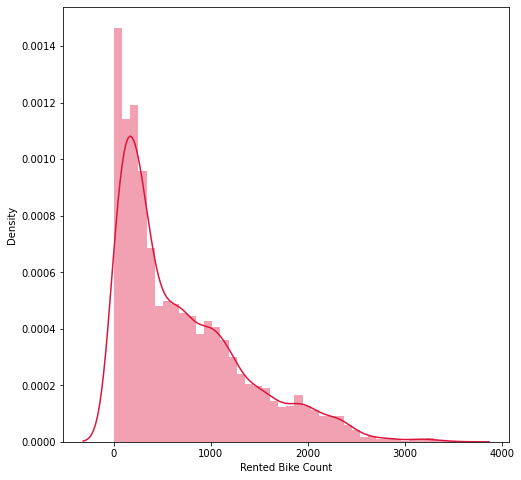

In [13]:
# Exploratory Data Analysis
# Distribution of dependent variables
dep = data['Rented Bike Count']
plt.figure(figsize=(8,8))
sns.distplot(dep,color = 'Crimson')
plt.show()

In [14]:
# Distribution of numeric independent variables
indep_numeric = list(data.describe().columns)
indep_numeric.remove('Rented Bike Count')
indep_numeric.remove('Hour')
print(len(indep_numeric))
colors = ['firebrick','Red','hotpink','indianred','lightcoral','mediumpurple','purple','cornflowerblue']

8


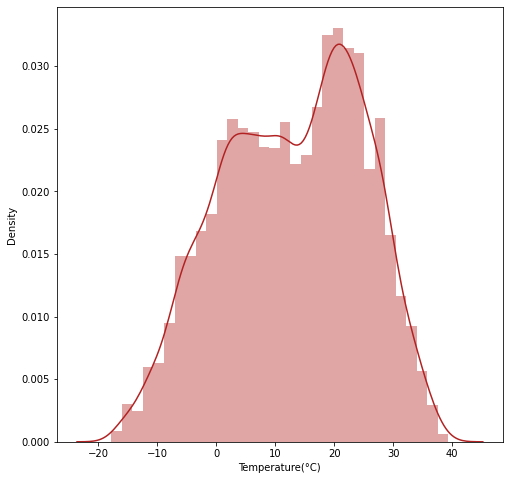

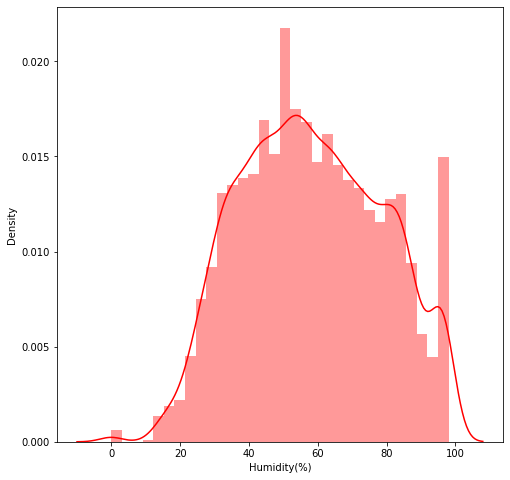

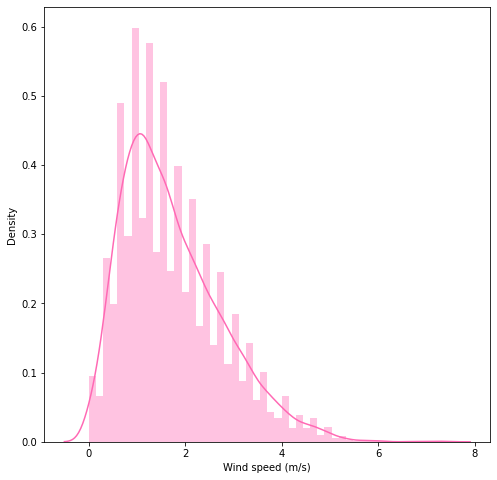

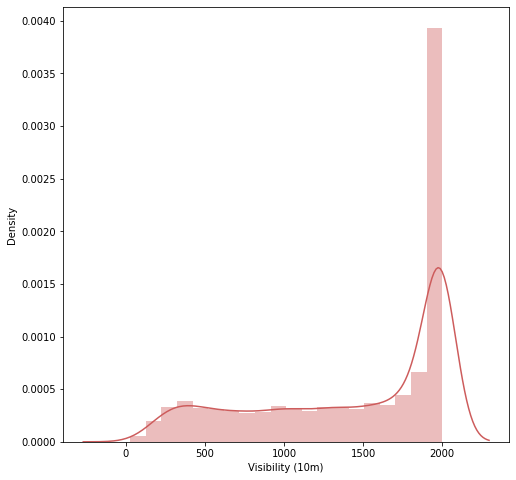

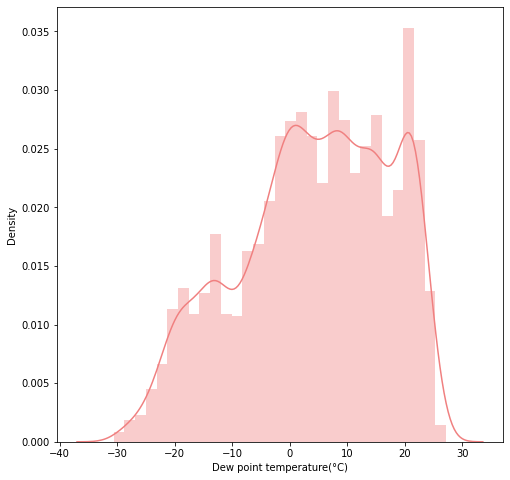

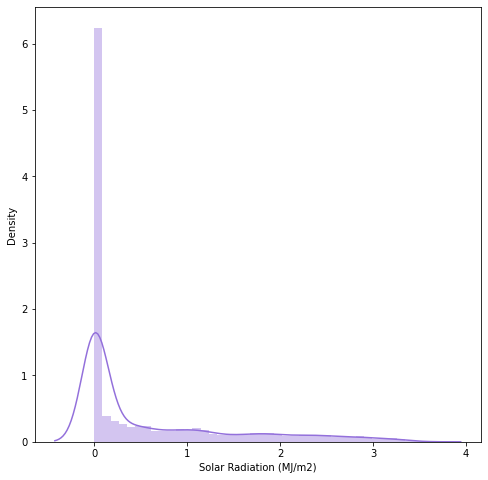

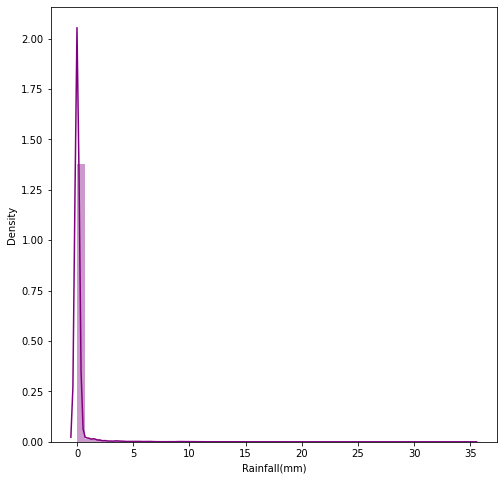

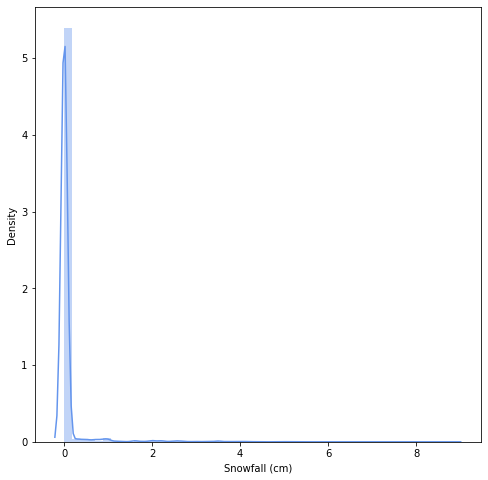

In [15]:
# Plotting Distribution for independent variables
j = 0
for i in indep_numeric:
  plt.figure(figsize=(8,8))
  sns.distplot(data[i],color = colors[j])
  j = j + 1
  plt.show()

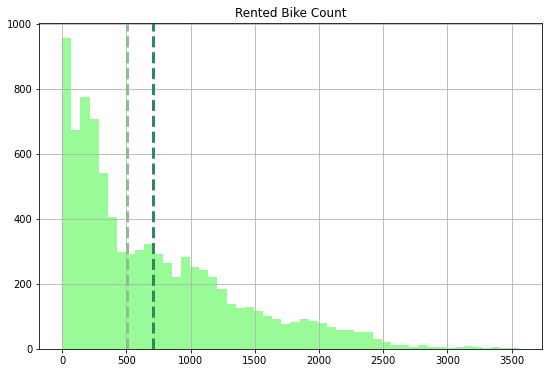

In [16]:
# Calculating mean median for dependent variable
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = data['Rented Bike Count']
feature.hist(bins=50, ax = ax,color = 'palegreen')
ax.axvline(feature.mean(),color = 'seagreen',linestyle='dashed', linewidth=3)
ax.axvline(feature.median(),color = 'darkseagreen',linestyle='dashed',linewidth=3)
ax.set_title('Rented Bike Count')
plt.show()

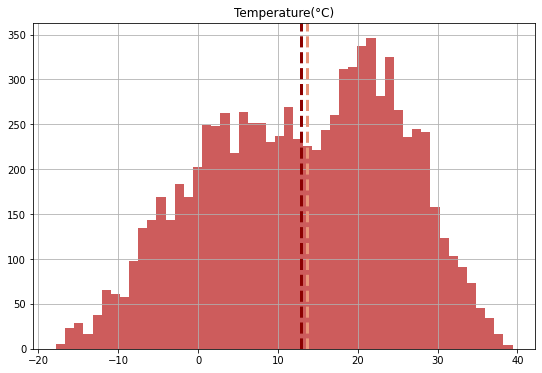

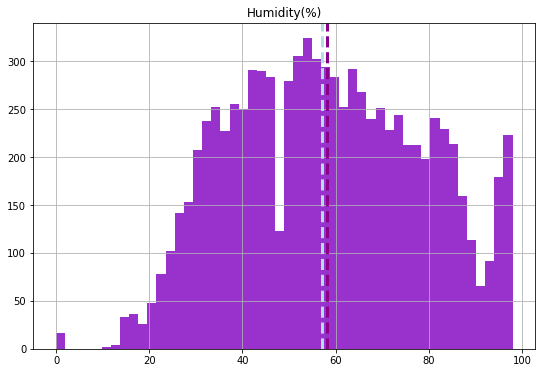

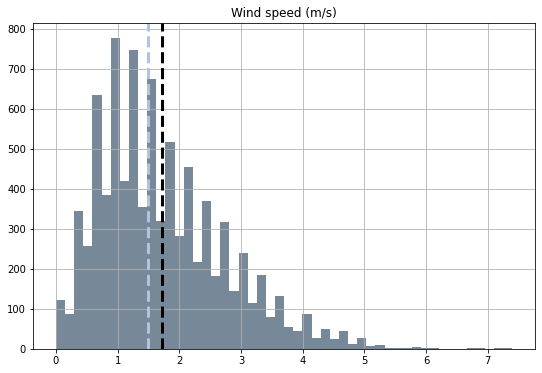

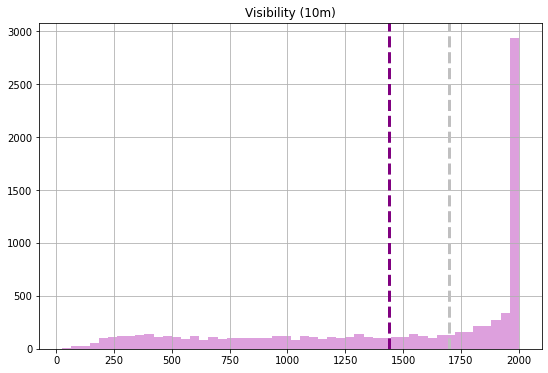

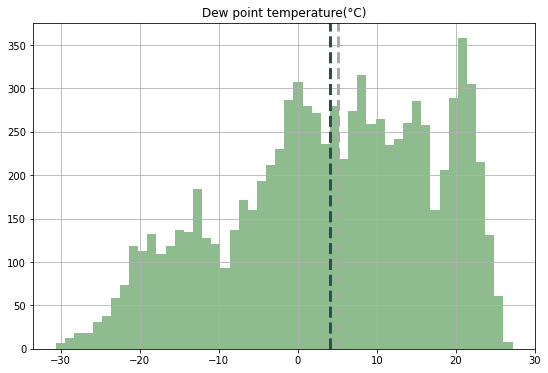

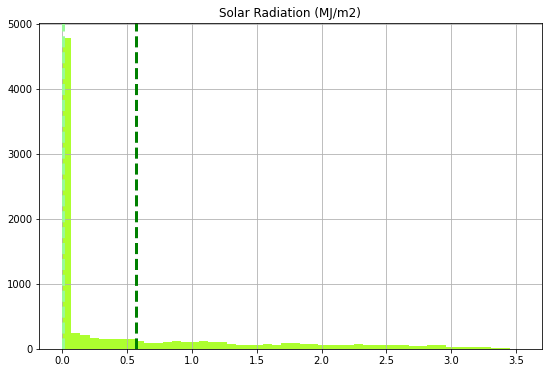

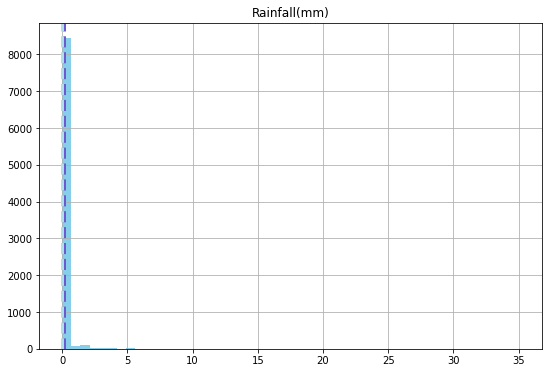

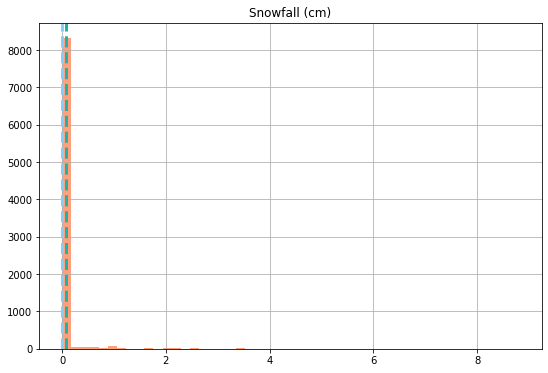

In [17]:
# Calculating mean median for independent variable
hcolor = ['indianred','darkorchid','lightslategray','plum','darkseagreen','greenyellow','skyblue','lightsalmon']
mcolor = ['darkred','darkmagenta','black','purple','darkslategray','green','slateblue','lightseagreen']
mdcolor = ['darksalmon','powderblue','lightsteelblue','silver','darkgray','palegreen','powderblue','lightskyblue']
j = 0
k = 0
l = 0
for i in indep_numeric:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = data[i]
  feature.hist(bins=50, ax = ax,color = hcolor[j])
  ax.axvline(feature.mean(),color = mcolor[k],linestyle='dashed', linewidth=3)
  ax.axvline(feature.median(),color = mdcolor[l],linestyle='dashed',linewidth=3)
  ax.set_title(i)
  j = j + 1
  k = k + 1
  l = l + 1
  plt.show()

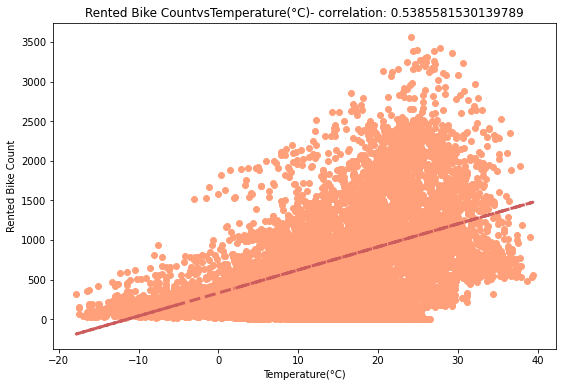

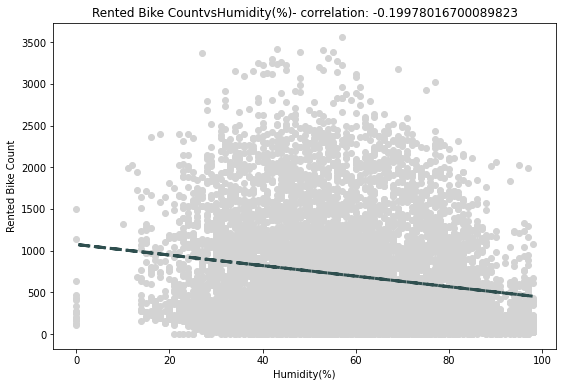

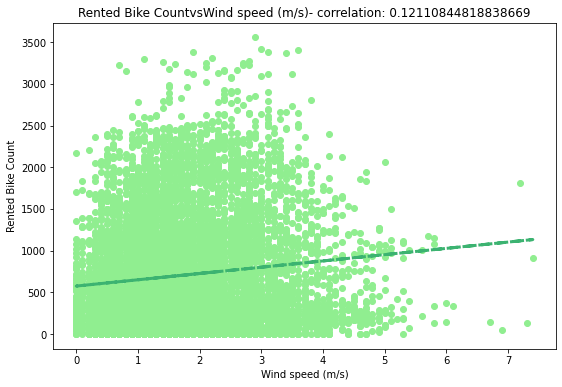

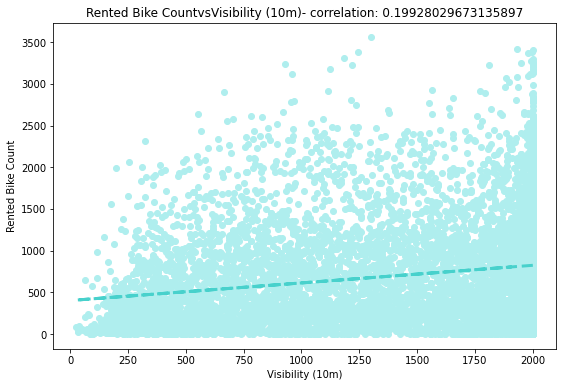

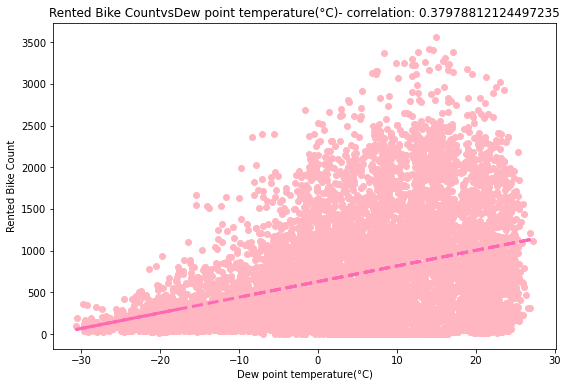

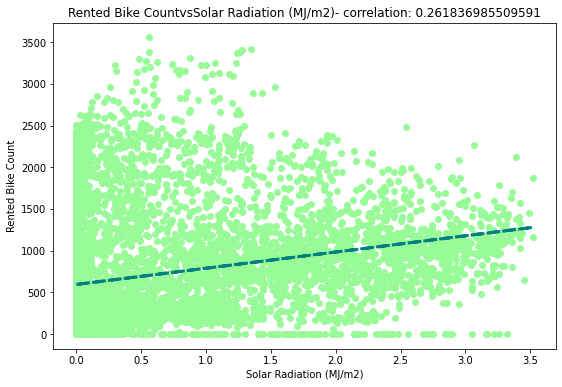

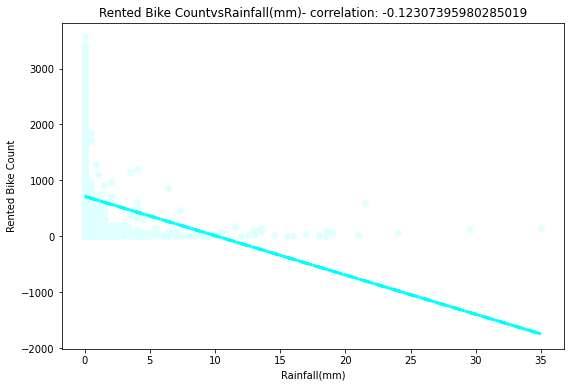

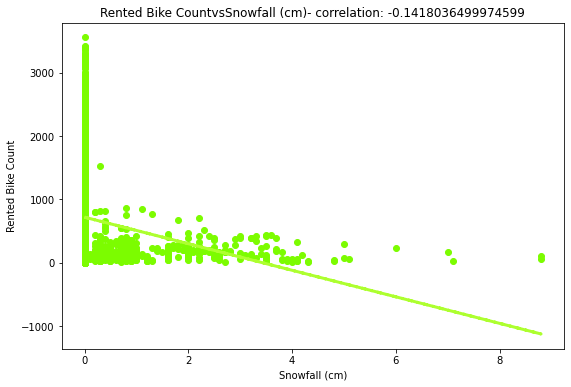

In [18]:
# Plotting scatter plot and correlation for dependent variable
lcolor = ['indianred','darkslategray','mediumseagreen','mediumturquoise','hotpink','teal','cyan','greenyellow']
pcolor = ['lightsalmon','lightgray','lightgreen','paleturquoise','lightpink','palegreen','lightcyan','lawngreen']
j = 0
k = 0
for i in indep_numeric:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = data[i]
  label = data['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,color = pcolor[j],alpha = 1)
  plt.xlabel(i)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count' + 'vs'  + i + '- correlation: ' + str(correlation))
  z = np.polyfit(data[i], data['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(data[i])
  plt.plot(data[i], y_hat, "r--", lw=3,color = lcolor[k])
  j = j + 1
  k = k + 1
plt.show()

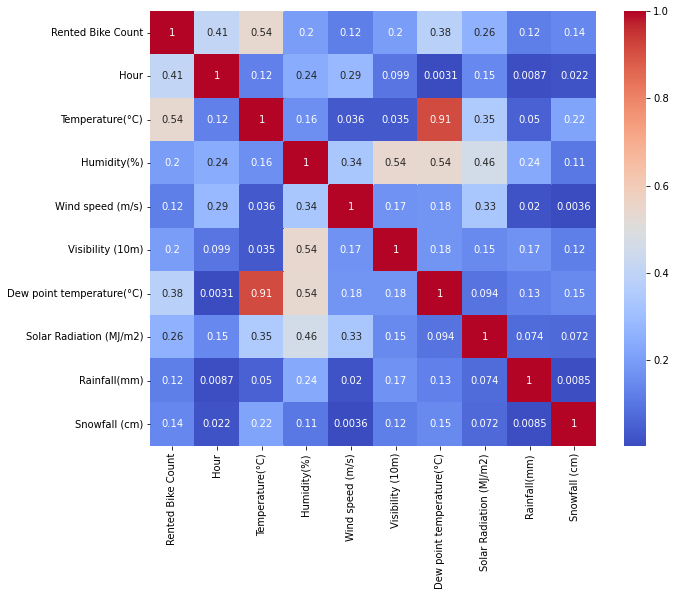

In [19]:
plt.figure(figsize=(10,8))
correlation = data.corr()
sns.heatmap(abs(correlation),annot = True, cmap='coolwarm')

In [20]:
# There exists a high multicolinearity between Temperature and Dew point Temperature
# Lets create a feature new feature Temperature which comprises the addition of temperature and dew point temperature
data['Temperature'] = data['Temperature(°C)'] + data['Dew point temperature(°C)']
data.drop('Temperature(°C)',axis = 1,inplace = True)
data.drop('Dew point temperature(°C)',axis = 1,inplace = True)

In [21]:
data.shape

(8760, 13)

In [22]:
data.columns
new_indep_numeric = data.describe().columns

In [23]:
# variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [24]:
calc_vif(data[[i for i in data[new_indep_numeric]]])

,variables,VIF
0,Rented Bike Count,3.953449
1,Hour,4.728069
2,Humidity(%),5.320401
3,Wind speed (m/s),4.686879
4,Visibility (10m),5.052379
5,Solar Radiation (MJ/m2),2.062358
6,Rainfall(mm),1.104190
7,Snowfall (cm),1.117343
8,Temperature,2.919880


In [25]:
# As of now feature engineering has been done on all the independent numeric variables

In [26]:
# Feature engineering on categorical variables
indep_cat = list((Counter(data.columns) - Counter(data.describe().columns)).elements())
indep_cat.remove('Date')
indep_cat

['Seasons', 'Holiday', 'Functioning Day']

In [27]:
# Count plot for Categorical Independent variables
indep_cat

['Seasons', 'Holiday', 'Functioning Day']

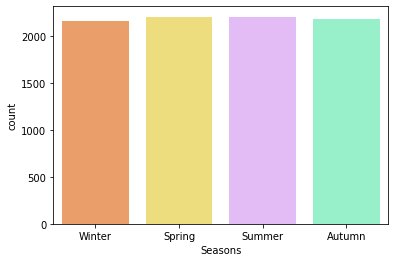

In [28]:
# Count plot for Seasons
sns.countplot(x=data[indep_cat[0]],palette=["#ff9a55","#ffea6c","#e7b2ff",'#89ffcc'])

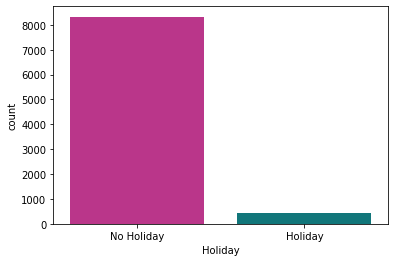

In [29]:
# Count plot for Holiday
sns.countplot(x=data[indep_cat[1]],palette=['#D02090','#00868B'])

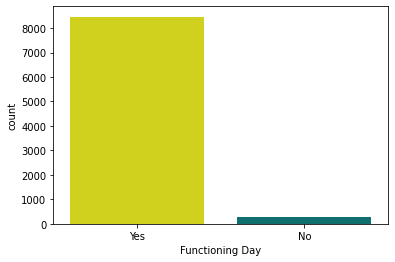

In [30]:
# Count plot for Functioning Day
sns.countplot(x=data[indep_cat[2]],palette = ['#EEEE00','#008080'])

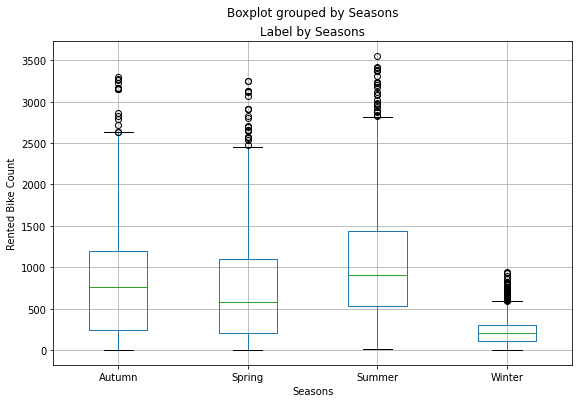

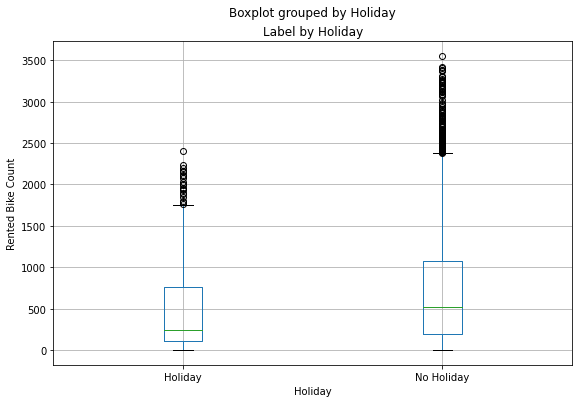

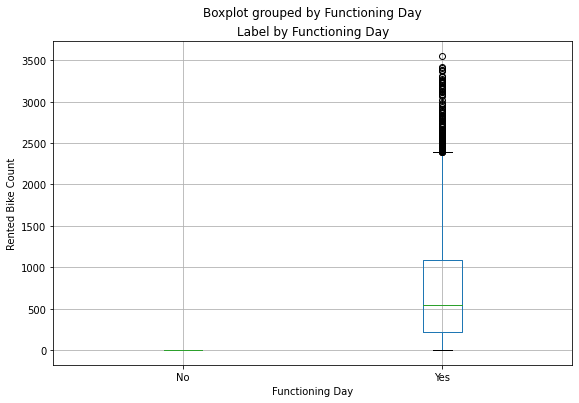

In [31]:
# Box plot for categorical independent variables
for i in indep_cat:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'Rented Bike Count', by = i, ax = ax)
    ax.set_title('Label by ' + i)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [32]:
# OneHotEncoding
data = pd.get_dummies(data, columns=['Seasons', 'Holiday', 'Functioning Day'], prefix=['Season', 'Holiday','Functioning Day'])

In [33]:
data.head()

,Date,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Temperature,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,01/12/2017,254,0,37,2.2,2000,0.0,0.0,0.0,-22.8,0,0,0,1,0,1,0,1
1,01/12/2017,204,1,38,0.8,2000,0.0,0.0,0.0,-23.1,0,0,0,1,0,1,0,1
2,01/12/2017,173,2,39,1.0,2000,0.0,0.0,0.0,-23.7,0,0,0,1,0,1,0,1
3,01/12/2017,107,3,40,0.9,2000,0.0,0.0,0.0,-23.8,0,0,0,1,0,1,0,1
4,01/12/2017,78,4,36,2.3,2000,0.0,0.0,0.0,-24.6,0,0,0,1,0,1,0,1


In [34]:
final_indep = list(data.columns)
final_indep.remove('Date')
final_indep.remove('Rented Bike Count')

# final_indep = ['Temperature','Solar Radiation (MJ/m2)']
final_dep = ['Rented Bike Count']
print(final_indep)
print(final_dep)
x = data[final_indep].values
y = data[final_dep].values

['Hour', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Temperature', 'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes']
['Rented Bike Count']


In [35]:
# Applying Zscore
from scipy.stats import zscore
a = data[final_indep].apply(zscore)
b = np.log10(data['Rented Bike Count'])

In [36]:
# Train_Test_Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(6132, 16)
(2628, 16)
(6132, 1)
(2628, 1)


In [37]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [38]:
# x_train.replace([np.inf, -np.inf], np.nan, inplace=True)
# x_train.isna().sum()
# x_train.fillna(0,inplace = True)
# y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
# y_train.isna().sum()
# y_train.fillna(0,inplace = True)

In [39]:
# Fitting the regression to data
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [40]:
reg.intercept_

array([-324.58220553])

In [41]:
reg.coef_

array([[  628.08388477, -1140.98368549,   138.85396071,    36.77477613,
         -284.17436473, -1984.54189779,   316.16134341,  1525.95331048,
          157.93298579,    40.85042353,    -2.88003293,  -195.90337639,
          -69.19415827,    69.19415827,  -470.73353393,   470.73353393]])

In [42]:
len(reg.coef_)

1

In [43]:
reg.score(x_train,y_train)

0.5534075445973741

In [44]:
y_train_pred = reg.predict(x_train)

In [45]:
y_test_pred = reg.predict(x_test)

In [46]:
# x_test.replace([np.inf, -np.inf], np.nan, inplace=True)
# x_test.isna().sum()
# x_test.fillna(0,inplace = True)
# y_test.replace([np.inf, -np.inf], np.nan, inplace=True)
# y_test.isna().sum()
# y_test.fillna(0,inplace = True)

In [47]:
# Error metrics
mean_squared_error(y_test, y_test_pred)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))
print(r2_score(y_train,y_train_pred))

0.541826430576599
0.5534075445973741


In [48]:
# from sklearn.metrics import r2_score
# r2 = r2_score(10**(y_test), 10**(y_test_pred))
# print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_test_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

In [49]:
# Applying lasso
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [50]:
lasso.score(x_train, y_train)

0.5534075445532436

In [51]:
# Cross Validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [52]:
lasso_regressor.best_params_

{'alpha': 0.01}

In [53]:
y_pred_test_lasso = lasso_regressor.predict(x_test)

In [54]:
mean_squared_error(y_test, y_pred_test_lasso)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test_lasso))

0.5418385283334259
